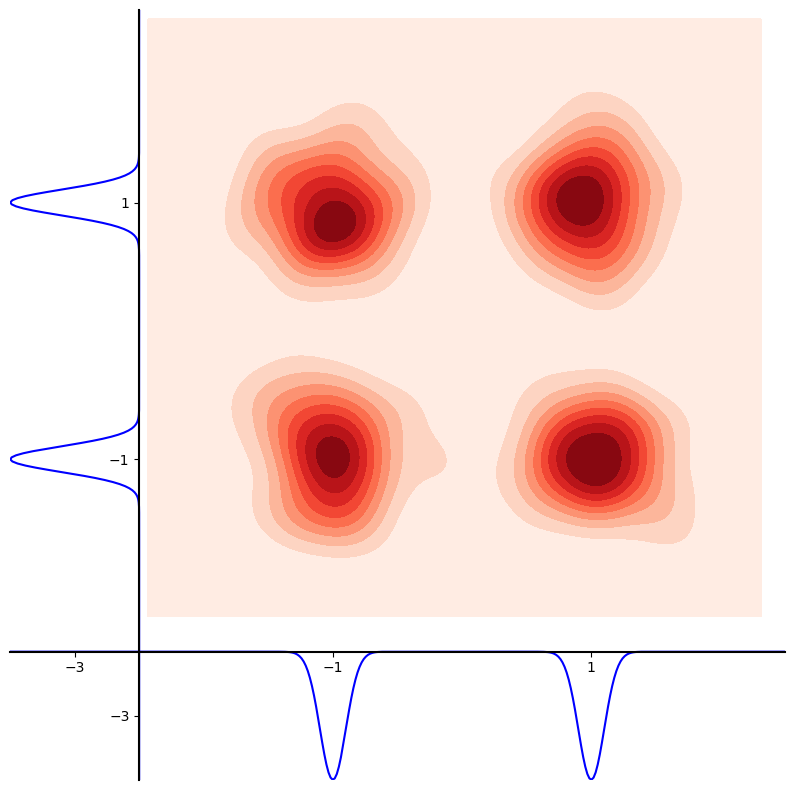

<Figure size 640x480 with 0 Axes>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
import seaborn as sns

# Define the means for the Gaussian components
means = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])

# Define the covariance matrices for the Gaussian components (identity matrices)
covariances = [np.eye(2)*0.1 for _ in range(4)]

# Generate data for each Gaussian component
n_samples_per_component = 100
np.random.seed(42)
data = []
for mean, cov in zip(means, covariances):
    samples = np.random.multivariate_normal(mean, cov, n_samples_per_component)
    data.append(samples)
data = np.vstack(data)

# Fit a Gaussian Mixture Model
n_components = 4
gmm = GaussianMixture(n_components=n_components, covariance_type='full', random_state=42)
gmm.fit(data)

# sample from the gmm
n_samples = 5000
samples = gmm.sample(n_samples)[0]


# Plot the density as a heatmap
plt.figure(figsize=(10, 10))
#move axis to the center
ax = plt.axes()
#kdplot
sns.kdeplot(x=data[:,0],y=data[:,1],cmap="Reds", fill=True, thresh=0, bw_adjust=0.5)
plt.xlim(-3, 3)
plt.ylim(-3, 3)


# Add 1D Gaussian distributions on x-axis and y-axis
x_gaussian = np.linspace(-4, 4, 500)
y_gaussian_x_axis = (
    (np.exp(-0.5 * ((x_gaussian - 1) ** 2/0.1**2)) + np.exp(-0.5 * ((x_gaussian + 1) ** 2/0.1**2)))
    / (2 * np.sqrt(2 * np.pi*0.1**2))/ 2
)
y_gaussian_y_axis = (
    (np.exp(-0.5 * ((x_gaussian - 1) ** 2/0.1**2)) + np.exp(-0.5 * ((x_gaussian + 1) ** 2/0.1**2)))
    / (2 * np.sqrt(2 * np.pi*0.1**2)) / 2
)

# Plot on x-axis and y-axis
plt.plot(-x_gaussian, -2.5-y_gaussian_x_axis, color="blue")
plt.plot(-2.5- y_gaussian_y_axis, -x_gaussian, color="blue")

#remove the tixk and the axis
# Move the axes to the center at (4, 4)
ax.spines['left'].set_position(('data', -2.5))
ax.spines['bottom'].set_position(('data', -2.5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.spines['left'].set_color('black')
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)




# Add ticks back
ax.set_xticks(np.arange(-3, 3, 2))
ax.set_yticks(np.arange(-3, 3, 2))
ax.set_xlim(-3.5, 2.5)
ax.set_ylim(-3.5, 2.5)
plt.show()



In [51]:
import numpy as np
def kl(p,q):
    #adjust for p_ij = 0
    p = p.flatten()
    q = q.flatten()
    mask = p!=0
    p = p[mask]
    q = q[mask]
    return np.sum(p*np.log(p/q))
def compute_kl_from_support(support):
    x_np = np.array(support)
    x_np = x_np/x_np.sum()
    p_c1 = x_np.sum(axis=0)/x_np.sum()
    p_c2 = x_np.sum(axis=1)/x_np.sum()
    p_c12 = x_np/x_np.sum()
    #computer kl for the two distributions
    return kl(p_c12,p_c1.reshape(-1,1) @ p_c2.reshape(1,-1))


In [53]:
#unfirom support 
x = [[1 for i in range(10)] for j in range(10)]
compute_kl_from_support(x)

0.0

In [58]:
#non-uniform support 
x = [[0 for i in range(10)] for j in range(10)]
for i in range(10):
    for j in range(10):
        if j <=i and i <=j+1:
            x[i][j] = 1/19.0
        else:
            x[i][j] = 1/100
compute_kl_from_support(x)

0.33117806168919117

In [57]:
#partial support 
x = [[0 for i in range(10)] for j in range(10)]
for i in range(10):
    for j in range(10):
        if j <=i and i <=j+1:
            x[i][j] =1
compute_kl_from_support(x)

1.7040703402696966